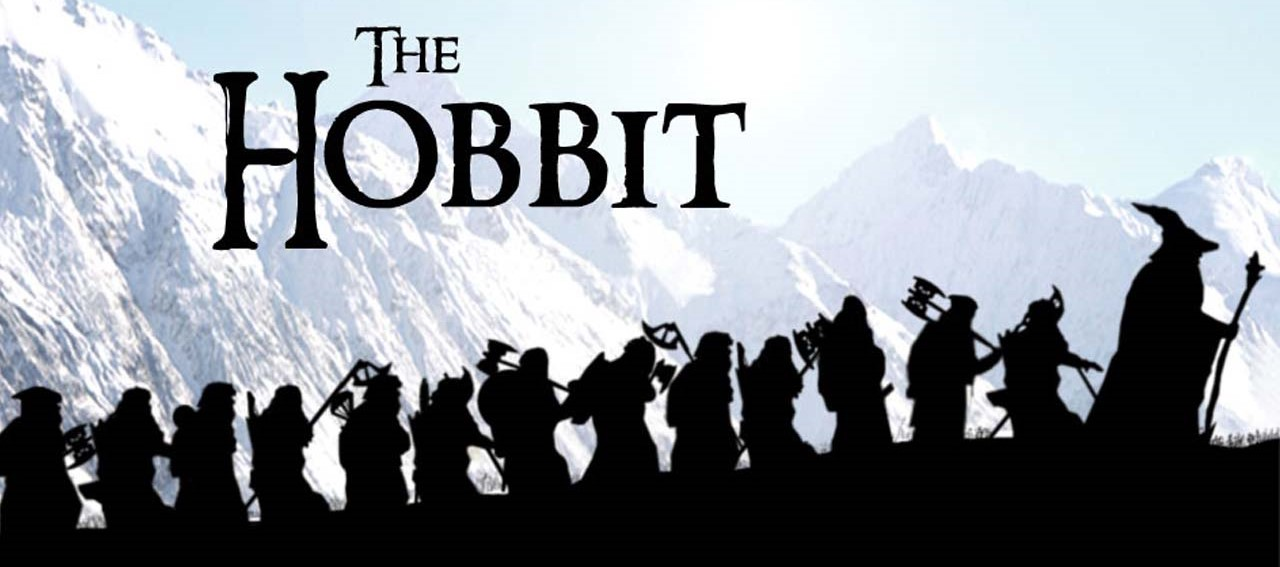

# ANÁLISIS DE SENTIMIENTOS: DE LO COTIDIANO A LO INCREÍBLE. 🧙

## PROYECTO FINAL PROCESAMIENTO DE LENGUAJE NATURAL NLP [2021-I] 📜

*Presentado por:* Julieth Andrea Murte Tavera. 👩🏻‍💻


*Docente:* Viviana Márquez 👩‍🏫

### Objetivo: Realizar un análisis de sentimientos sobre el libro *El Hobbit de JRR Tolkien* 🧝‍♀️🧚‍♀️🧚‍♂️🧙‍♀️🧝‍🔮

#### * Conocer el impacto que genera el análisis de sentimiento alrededor de una historia de fantasía.
#### * Realizar un resumen del libro a través de un modelo de ML.


*Desarrollo del proyecto:* 
1. Adquisión de los datos.
2. Limpieza del texto.
3. Pre-procesamiento.
4. Feature Engenieering.
5. Modelado.
6. Evaluación del Rendimiento. 

*Adquisión de los datos.* 
Libro El Hobbit formato PDF. Idioma: Español.
<https://www.holaebook.com/book/j-r-r-tolkien-el-hobbit.html>


In [1]:
import fitz
import pandas as pd
import numpy as np

from collections import Counter

import gensim.models.word2vec as w2v
import gensim

import re
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
stopwords_en = stopwords.words('english')

import spacy
import es_core_news_sm

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from termcolor import colored

import pyLDAvis.gensim_models
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import PIL.Image
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True)

C:\Users\CHOMELY\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
doc = fitz.open('C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Proyecto/El Hobbit - J. R. R. Tolkien.pdf')

In [3]:
print("Número de páginas: ", doc.pageCount)
print("Metados: ", doc.metadata)

Número de páginas:  278
Metados:  {'format': 'PDF 1.4', 'title': 'El Hobbit', 'author': 'J. R. R. Tolkien', 'subject': '', 'keywords': 'Novela, FantÃ¡stico', 'creator': 'calibre 2.53.0 [http://calibre-ebook.com]', 'producer': 'calibre 2.53.0 [http://calibre-ebook.com]', 'creationDate': "D:20160418174953+00'00'", 'modDate': '', 'trapped': '', 'encryption': None}


In [4]:
pagina = doc.loadPage(3)
texto = pagina.getText("text")
print(texto)

J. R. R. Tolkien
El Hobbit
o historia de una ida y una vuelta



In [5]:
toc = doc.get_toc()
toc

[[1, 'El Hobbit', 4],
 [1, '1. Una tertulia inesperada', 7],
 [1, '2. Carnero asado', 29],
 [1, '3. Un breve descanso', 45],
 [1, '4 Sobre la colina y bajo la colina', 54],
 [1, '5 Acertijos en las tinieblas', 65],
 [1, '6 De la sartén al fuego', 84],
 [1, '7 Extraños aposentos', 101],
 [1, '8 Moscas y arañas', 124],
 [1, '9 Barriles de contrabando', 149],
 [1, '10 Una cálida bienvenida', 163],
 [1, '11 En el umbral', 174],
 [1, '12 Información secreta', 183],
 [1, '13 Nadie en casa', 202],
 [1, '14 Fuego y agua', 214],
 [1, '15 El encuentro de las nubes', 223],
 [1, '16 Un ladrón en la noche', 232],
 [1, '17 Las nubes estallan', 237],
 [1, '18 El viaje de vuelta', 248],
 [1, '19 La última jornada', 257],
 [1, 'Anexos', 266],
 [2, 'Mapa de Thror', 267],
 [2, 'Mapa de las Tierras Ásperas', 269],
 [2, 'Mapa de la Batalla de los 5 Ejércitos', 271],
 [2, 'Las Runas de El Hobbit', 273],
 [1, 'Autor', 277]]

In [6]:
c1 = doc.get_toc()[1]
c1 = c1[1]
print(c1)

cap1 =[]
 
for i in range(6,28):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap1.append(book)
    
cap1 = " ".join(cap1)

1. Una tertulia inesperada


In [7]:
c2 = doc.get_toc()[2]
c2 = c2[1]
print(c2)

cap2 =[]
 
for i in range(28,44):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap2.append(book)

cap2 = " ".join(cap2) 

2. Carnero asado


In [8]:
c3 = doc.get_toc()[3]
c3 = c3[1]
print(c3)

cap3 =[]
 
for i in range(44,53):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap3.append(book)
    
cap3 = " ".join(cap3)

3. Un breve descanso


In [9]:
c4 = doc.get_toc()[4]
c4 = c4[1]
print(c4)

cap4 =[]
 
for i in range(53,64):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap4.append(book)
    
cap4 = " ".join(cap4)

4 Sobre la colina y bajo la colina


In [10]:
c5 = doc.get_toc()[5]
c5 = c5[1]
print(c5)

cap5 =[]
 
for i in range(64,83):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap5.append(book)

cap5 = " ".join(cap5)

5 Acertijos en las tinieblas


In [11]:
c6 = doc.get_toc()[6]
c6 = c6[1]
print(c6)

cap6 =[]
 
for i in range(83,100):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap6.append(book)
    
cap6 = " ".join(cap6)

6 De la sartén al fuego


In [12]:
c7 = doc.get_toc()[7]
c7 = c7[1]
print(c7)

cap7 =[]
 
for i in range(100,123):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap7.append(book)
    
cap7 = " ".join(cap7)

7 Extraños aposentos


In [13]:
c8 = doc.get_toc()[8]
c8 = c8[1]
print(c8)

cap8 =[]
 
for i in range(123,148):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap8.append(book)

cap8 = " ".join(cap8)

8 Moscas y arañas


In [14]:
c9 = doc.get_toc()[9]
c9 = c9[1]
print(c9)

cap9 =[]
 
for i in range(148,162):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap9.append(book)
    
cap9 = " ".join(cap9)

9 Barriles de contrabando


In [15]:
c10 = doc.get_toc()[10]
c10 = c10[1]
print(c10)

cap10 =[]
 
for i in range(162,172):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap10.append(book)

cap10 = " ".join(cap10)

10 Una cálida bienvenida


In [16]:
c11 = doc.get_toc()[11]
c11 = c11[1]
print(c11)

cap11 =[]
 
for i in range(173,182):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap11.append(book)
    
cap11 = " ".join(cap11)

11 En el umbral


In [17]:
c12 = doc.get_toc()[12]
c12 = c12[1]
print(c12)

cap12 =[]
 
for i in range(182,200):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap12.append(book)

        
cap12 = " ".join(cap12)

12 Información secreta


In [18]:
c13 = doc.get_toc()[13]
c13 = c13[1]
print(c13)

cap13 =[]
 
for i in range(201,213):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap13.append(book)
        
cap13 = " ".join(cap13)

13 Nadie en casa


In [19]:
c14 = doc.get_toc()[14]
c14 = c14[1]
print(c14)

cap14 =[]
 
for i in range(213,222):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap14.append(book)

    
cap14 = " ".join(cap14)

14 Fuego y agua


In [20]:
c15 = doc.get_toc()[15]
c15 = c15[1]
print(c15)

cap15 =[]
 
for i in range(222,231):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap15.append(book)
    
cap15 = " ".join(cap15)

15 El encuentro de las nubes


In [21]:
c16 = doc.get_toc()[16]
c16 = c16[1]
print(c16)

cap16 =[]
 
for i in range(231,236):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap16.append(book)
    
    
cap16 = " ".join(cap16)


16 Un ladrón en la noche


In [22]:
c17 = doc.get_toc()[17]
c17 = c17[1]
print(c17)

cap17 =[]
 
for i in range(236,247):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap17.append(book)
    
cap17 = " ".join(cap17)


17 Las nubes estallan


In [23]:
c18 = doc.get_toc()[18]
c18 = c18[1]
print(c18)

cap18 =[]
 
for i in range(247,256):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap18.append(book)
    
    
cap18 = " ".join(cap18)

18 El viaje de vuelta


In [24]:
c19 = doc.get_toc()[19]
c19 = c19[1]
print(c19)

cap19 =[] 
for i in range(256,265):
    pagina = doc.loadPage(i)
    book = pagina.getText()
    cap19.append(book)
    
cap19 = " ".join(cap19)

19 La última jornada


In [25]:
n_cap = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19]

In [26]:
texto = [cap1, cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9,cap10,cap11,cap12,cap13,cap14,cap15,cap16,cap17,cap18,cap19]

In [27]:
df = pd.DataFrame(list(zip(n_cap,texto)), columns = ['capitulo','texto'])
df

,capitulo,texto
0,1. Una tertulia inesperada,E\n1\nUna tertulia inesperada\nn un agujero en...
1,2. Carnero asado,B\n2\nCarnero asado\nilbo se levantó de un sal...
2,3. Un breve descanso,N\n3\nUn breve descanso\no cantaron ni contaro...
3,4 Sobre la colina y bajo la colina,H\n4\nSobre la colina y bajo la colina\nabía m...
4,5 Acertijos en las tinieblas,C\n5\nAcertijos en las tinieblas\nuando Bilbo ...
5,6 De la sartén al fuego,B\n6\nDe la sartén al fuego\nilbo había escapa...
6,7 Extraños aposentos,A\n7\nExtraños aposentos\nla mañana siguiente ...
7,8 Moscas y arañas,C\n8\nMoscas y arañas\naminaban en fila. La en...
8,9 Barriles de contrabando,E\n9\nBarriles de contrabando\nl día que sigui...
9,10 Una cálida bienvenida,E\n10\nUna cálida bienvenida\nl día crecía más...


In [28]:
#df.to_csv('hobbit.csv')

In [29]:
stopwords_sp.extend(["si,El,Los"])

def pre_procesado(texto):
    texto = re.sub(r"[\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

pre_procesado("Una cálida bienvenida\nl alto A a del al 20 día crecí 10 ¡¡¡ ")

'Una cálida bienvenida l alto A día crecí ¡¡¡'

In [30]:
df['pp'] = df['texto'].apply(lambda texto: pre_procesado(texto))

df

,capitulo,texto,pp
0,1. Una tertulia inesperada,E\n1\nUna tertulia inesperada\nn un agujero en...,"E Una tertulia inesperada n agujero suelo, viv..."
1,2. Carnero asado,B\n2\nCarnero asado\nilbo se levantó de un sal...,"B Carnero asado ilbo levantó salto, poniéndose..."
2,3. Un breve descanso,N\n3\nUn breve descanso\no cantaron ni contaro...,N Un breve descanso cantaron contaron historia...
3,4 Sobre la colina y bajo la colina,H\n4\nSobre la colina y bajo la colina\nabía m...,H Sobre colina bajo colina abía muchas sendas ...
4,5 Acertijos en las tinieblas,C\n5\nAcertijos en las tinieblas\nuando Bilbo ...,"C Acertijos tinieblas uando Bilbo abrió ojos, ..."
5,6 De la sartén al fuego,B\n6\nDe la sartén al fuego\nilbo había escapa...,"B De sartén fuego ilbo escapado trasgos, sabía..."
6,7 Extraños aposentos,A\n7\nExtraños aposentos\nla mañana siguiente ...,A Extraños aposentos mañana siguiente Bilbo de...
7,8 Moscas y arañas,C\n8\nMoscas y arañas\naminaban en fila. La en...,C Moscas arañas aminaban fila. La entrada send...
8,9 Barriles de contrabando,E\n9\nBarriles de contrabando\nl día que sigui...,E Barriles contrabando l día siguió batalla ar...
9,10 Una cálida bienvenida,E\n10\nUna cálida bienvenida\nl día crecía más...,E Una cálida bienvenida l día crecía claro cal...


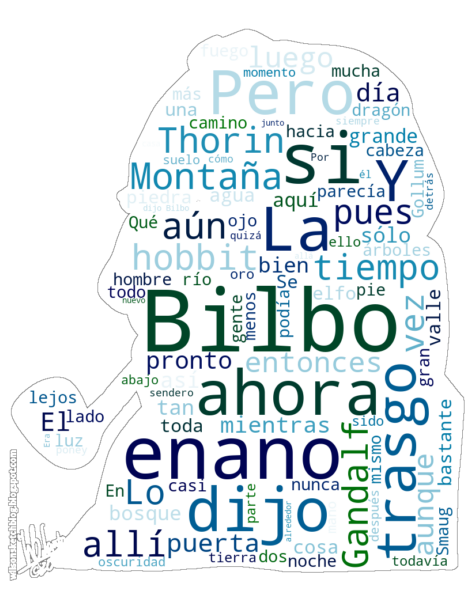

In [31]:
img = PIL.Image.open("C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Proyecto/tolien.png")
mask = np.array(img) #Emblema de Gandalf
palabras = df.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="ocean",
                      mask=mask,contour_width=1, contour_color='gray').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

image_colors=ImageColorGenerator(mask)
plt.figure(figsize=(10,8))
plt.imshow( wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Word2Vec

In [32]:
def pre_procesado2(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto.split()

df['list'] = df['pp'].apply(lambda texto: pre_procesado2(texto))


In [33]:
wordlength = list()

for chapter in texto:
    count = len(chapter)
        
    wordlength.append(count)  

cp = pd.DataFrame(wordlength)  
cp=cp.rename(columns={0: 'Total_words'})


In [34]:
df = pd.merge(df, cp, left_index=True, right_index=True)

In [35]:
df

,capitulo,texto,pp,list,Total_words
0,1. Una tertulia inesperada,E\n1\nUna tertulia inesperada\nn un agujero en...,"E Una tertulia inesperada n agujero suelo, viv...","[tertulia, inesperada, n, agujero, suelo, viví...",48326
1,2. Carnero asado,B\n2\nCarnero asado\nilbo se levantó de un sal...,"B Carnero asado ilbo levantó salto, poniéndose...","[b, carnero, asado, ilbo, levantó, salto, poni...",29386
2,3. Un breve descanso,N\n3\nUn breve descanso\no cantaron ni contaro...,N Un breve descanso cantaron contaron historia...,"[n, breve, descanso, cantaron, contaron, histo...",16253
3,4 Sobre la colina y bajo la colina,H\n4\nSobre la colina y bajo la colina\nabía m...,H Sobre colina bajo colina abía muchas sendas ...,"[h, colina, bajo, colina, abía, muchas, sendas...",23506
4,5 Acertijos en las tinieblas,C\n5\nAcertijos en las tinieblas\nuando Bilbo ...,"C Acertijos tinieblas uando Bilbo abrió ojos, ...","[c, acertijos, tinieblas, uando, bilbo, abrió,...",38827
5,6 De la sartén al fuego,B\n6\nDe la sartén al fuego\nilbo había escapa...,"B De sartén fuego ilbo escapado trasgos, sabía...","[b, sartén, fuego, ilbo, escapado, trasgos, sa...",38245
6,7 Extraños aposentos,A\n7\nExtraños aposentos\nla mañana siguiente ...,A Extraños aposentos mañana siguiente Bilbo de...,"[extraños, aposentos, mañana, siguiente, bilbo...",49251
7,8 Moscas y arañas,C\n8\nMoscas y arañas\naminaban en fila. La en...,C Moscas arañas aminaban fila. La entrada send...,"[c, moscas, arañas, aminaban, fila, entrada, s...",54640
8,9 Barriles de contrabando,E\n9\nBarriles de contrabando\nl día que sigui...,E Barriles contrabando l día siguió batalla ar...,"[barriles, contrabando, l, día, siguió, batall...",32170
9,10 Una cálida bienvenida,E\n10\nUna cálida bienvenida\nl día crecía más...,E Una cálida bienvenida l día crecía claro cal...,"[cálida, bienvenida, l, día, crecía, claro, ca...",22538


ETIQUETADO GRAMATICAL

In [36]:
lista = list(df["list"])
lista=lista[0]

In [37]:
cadena = " ".join(lista)

In [38]:
nlp = es_core_news_sm.load()
doc = nlp(cadena)

In [39]:
d1 = pd.DataFrame ()
d1['text'] = [palabra.text for palabra in doc]
d1['pos_tagging'] =[palabra.pos_ for palabra in doc]
d1['pos_tagging'] = d1['pos_tagging'].str.strip('()').str.split(',')
d1

,text,pos_tagging
0,tertulia,[NOUN]
1,inesperada,[ADJ]
2,n,[NOUN]
3,agujero,[NOUN]
4,suelo,[ADJ]
...,...,...
4290,intranquilos,[ADJ]
4291,despertó,[VERB]
4292,después,[ADV]
4293,naciera,[VERB]


In [40]:
temp = pd.DataFrame(list(zip(Counter(sum(d1.pos_tagging.values,[])).keys(),Counter(sum(d1.pos_tagging.values,[])).values())))
temp.columns = ['eti', 'cnt']
temp

,eti,cnt
0,NOUN,1282
1,ADJ,1103
2,VERB,1117
3,ADV,411
4,AUX,64
5,DET,111
6,SCONJ,61
7,CCONJ,3
8,ADP,36
9,INTJ,1


In [41]:
trace = go.Bar(x=temp.eti.values[:15],
               y=temp.cnt.values[:15])

layout = go.Layout(title='Etiquetado Gramatical')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [42]:
![TABLE.png](attachment:TABLE.png)

"[TABLE.png]" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


WORD2VEC

In [43]:
%%time

mi_modelo = w2v.Word2Vec(df['list'].values,
                        sg=1, # 1 para usar skip-gram, 0 para usar CBOW
                        seed=1, # 1 para tener resultados reproducibles y debuggear
                        vector_size=256, # tamaño de los vectores 
                        min_count=10, # mínimo de veces que ha de aparecer una palabra para ser considerada
                        window=12, # ventana contextual de cada palabra
                        )

Wall time: 3.63 s


In [44]:
def similitud(inicio1, fin1, inicio2):
    fin2 = mi_modelo.wv.most_similar_cosmul(
    positive=[inicio2, inicio1],
    negative=[fin1])[0][0]
    return f"{inicio1} es a {fin1} como {inicio2} es a {fin2}"

similitud("bilbo", "hobbit", "bardo")

'bilbo es a hobbit como bardo es a gobernador'

In [45]:
matrix = pd.DataFrame(mi_modelo.wv.get_normed_vectors(), index = mi_modelo.wv.key_to_index)
matrix

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
bilbo,0.006143,-0.000943,0.062059,0.022840,0.085708,0.006300,0.042926,0.048208,-0.027168,0.095449,...,0.111910,0.069542,0.066456,-0.041857,-0.025446,0.000450,-0.172588,-0.027327,-0.017508,0.055066
dijo,0.016902,-0.023656,0.045083,-0.001500,0.024800,-0.008211,0.077004,0.096715,0.035388,0.088083,...,0.135026,0.063636,-0.005854,-0.036087,-0.013181,0.023760,-0.098528,-0.051637,0.003083,0.018598
enanos,0.017439,0.018137,0.039567,0.002882,0.085867,-0.014332,0.020077,0.040474,-0.004886,0.046179,...,0.141381,0.058631,0.062339,0.008460,-0.053995,0.052339,-0.131588,-0.043727,0.011962,0.092090
si,0.019438,0.003557,0.053865,0.004878,0.055142,-0.014221,0.030433,0.086136,0.038931,0.057927,...,0.150582,0.062423,0.014675,-0.003398,-0.053082,0.046721,-0.109101,-0.047911,0.022139,0.062148
thorin,0.012004,-0.006363,0.035597,-0.004212,0.036080,-0.002645,0.073610,0.086483,0.029279,0.091877,...,0.152320,0.068715,0.019418,-0.021107,-0.020470,0.038131,-0.110028,-0.064782,0.003755,0.037830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
salvo,0.024358,0.027615,0.063939,0.021859,0.114530,-0.009418,0.005187,0.027312,-0.014816,0.040867,...,0.132158,0.050828,0.051300,0.011991,-0.054209,0.047580,-0.140018,-0.042135,0.006417,0.089735
descubrir,0.017918,0.013780,0.056094,0.015388,0.102965,-0.009771,0.022653,0.040819,-0.014801,0.059629,...,0.133596,0.060396,0.051318,-0.004413,-0.043907,0.040419,-0.147401,-0.038176,0.005741,0.073780
hogar,0.021234,0.032739,0.063436,0.025829,0.106160,-0.009481,0.003597,0.030621,-0.013217,0.045422,...,0.130820,0.051888,0.049075,0.012093,-0.056809,0.044615,-0.136380,-0.042439,0.013304,0.091858
trepar,0.021218,0.028544,0.064579,0.023411,0.119270,-0.009771,0.004157,0.022870,-0.022607,0.047028,...,0.123071,0.057013,0.062007,0.007376,-0.050088,0.038809,-0.146009,-0.042242,0.006202,0.087235


In [46]:
pca = PCA(n_components=2)

result = pca.fit_transform(matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['Palabra'] = matrix.index.values


trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['Palabra'].values,
                   mode='markers',
                   name="vocabulario") 

layout = go.Layout(title="PCA")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [47]:
mi_modelo.wv.most_similar("elfo") 

[('gobernador', 0.9892460703849792),
 ('gente', 0.9882349967956543),
 ('dain', 0.9878129363059998),
 ('pues', 0.9876284003257751),
 ('elrond', 0.9869123697280884),
 ('canciones', 0.9841592311859131),
 ('años', 0.9824415445327759),
 ('thror', 0.9781417846679688),
 ('armas', 0.9760600328445435),
 ('mayor', 0.9759758114814758)]

🧝🧝‍♂️🧝‍♀️

In [48]:
mi_modelo.wv.most_similar("anillo")

[('bilbo', 0.9769097566604614),
 ('hobbit', 0.9765647649765015),
 ('cabeza', 0.9740321636199951),
 ('arañas', 0.9739377498626709),
 ('mano', 0.9718552231788635),
 ('araña', 0.9714415669441223),
 ('podía', 0.970696747303009),
 ('espada', 0.9698453545570374),
 ('rato', 0.9697338938713074),
 ('piernas', 0.9691365957260132)]

💍

Clasificación de texto

k-means

In [49]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(df.pp.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

print(f"Tenemos: {tfidf_matrix.shape[0]} Filas.")
print(f"Tenemos: {tfidf_matrix.shape[1]} Columnas.")
tfidf_matrix

Tenemos: 19 Filas.
Tenemos: 10801 Columnas.


,Abajo,Abismo,Abrazó,Abrió,Acababa,Acabo,Acamparon,Acaso,Aceptaré,Acercaos,...,últimamente,últimas,último,últimos,única,únicamente,únicas,único,útil,útiles
0,0.000000,0.000000,0.000000,0.012456,0.009842,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.017538,0.000000,0.000000,0.000000,0.009842,0.012053,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.015559,0.000000,0.000000,0.000000,0.000000,0.007128,0.010646,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025352,0.000000,0.00000,0.000000,...,0.000000,0.020881,0.020345,0.000000,0.000000,0.000000,0.000000,0.027964,0.000000,0.000000
3,0.021992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.015483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.006803,0.000000,0.005607,0.000000,0.000000,0.004675,0.006982,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.005063,0.023498,0.000000,0.000000,0.000000,0.000000,0.000000,0.009599
6,0.000000,0.000000,0.000000,0.000000,0.009315,0.000000,0.000000,0.000000,0.00000,0.023579,...,0.000000,0.000000,0.012450,0.000000,0.006841,0.011789,0.000000,0.005704,0.000000,0.000000
7,0.000000,0.010886,0.000000,0.000000,0.000000,0.010886,0.000000,0.000000,0.00000,0.000000,...,0.010886,0.023597,0.034486,0.000000,0.012633,0.000000,0.008601,0.010533,0.000000,0.014529
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013149,0.00000,0.000000,...,0.000000,0.000000,0.046863,0.009063,0.009656,0.000000,0.013149,0.000000,0.000000,0.011106
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.016313,0.000000,0.012295,0.013100,0.000000,0.000000,0.010923,0.000000,0.000000


In [50]:
ks = []
k_inertias = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

C:\Users\CHOMELY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



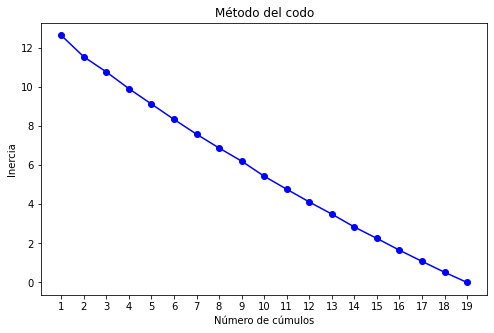

In [51]:
plt.figure(figsize=(8,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.xticks(ks)
plt.plot(ks, k_inertias, 'bo-',color = 'blue');

In [52]:
#k = 8
#model = KMeans(n_clusters=k)
#model.fit(tfidf_matrix)
#df['cluster'] = model.labels_

In [53]:
#df[['pp','cluster']]

In [54]:
#nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

#clust_cnt = df['cluster'].value_counts()
#clust_cnt_pct = df['cluster'].value_counts(normalize=True)

#centroids = model.cluster_centers_

#terms = tfidf_vect.get_feature_names()
#order_centroids = centroids.argsort()[:, ::-1]

#for i in range(k):
#    print(colored(f"Cluster No. {i}", 'blue', attrs=['bold','underline','reverse']))
#    print(colored(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos", attrs=['bold']))
#    print()
    
#    print(colored("Términos más representativos", 'cyan', attrs=['bold']))
#    for ind in order_centroids[i][:20]:
#        print(colored(terms[ind], attrs=['bold']), end=" ")
#        
#    print()
#    print("********************************************")
#    print()

 Modelado de temas

In [55]:
dictionary = Dictionary(df['list'].values) # Crear una representación de los documentos en forma de diccionario
dictionary #Diccionario de tipo gensim que el modelo va a utilizar
dictionary.filter_extremes(no_below=5, no_above=0.5) # Filtrar palabras muy frecuentes o no frecuentes filtrar extremos, número por debajo 
#igual a 5 y por enciam las palabras frecuente no agregan informacion valiosa para la clasificacion quite las palabras que 
#están en más del 50% de los documentos 0.5 y si una palabra no aparece en más de 5 documentos quitar

In [56]:
# Corpus
corpus = [dictionary.doc2bow(text) for text in df['list'].values] #Obtener el corpus bag o words, de documento a bolsa de palabras
#El corpus por cada documento entrega las palabras y su ubicacion la cantidad de veces que currieron en el documentso
#Una representacio vectorial


In [138]:
# Entrenar el modelo
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5, passes=80) #id2word de indice a palabras, 7 número de temas
#Pasadas para que el modelo mejore

In [139]:
model.print_topics(num_words=5) #imprima los tema del modelo y muestre las 10 palabras más importante

[(0,
  '0.012*"túnel" + 0.011*"bardo" + 0.008*"perdido" + 0.008*"campamento" + 0.008*"pared"'),
 (1,
  '0.033*"beorn" + 0.016*"poneys" + 0.009*"trasgo" + 0.009*"historia" + 0.009*"sala"'),
 (2,
  '0.015*"aguas" + 0.013*"barril" + 0.011*"vino" + 0.011*"corriente" + 0.010*"guardias"'),
 (3,
  '0.024*"bardo" + 0.018*"gobernador" + 0.011*"elrond" + 0.010*"beorn" + 0.008*"adiós"'),
 (4,
  '0.010*"árbol" + 0.008*"lobos" + 0.008*"dori" + 0.007*"dragones" + 0.007*"trolls"')]

In [140]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=True) #sort topics ordenar
pyLDAvis.display(lda_display)

In [60]:
def get_doc_top_n(text_processed, n):
    d = dictionary.doc2bow(text_processed)
    topics = dict(model.get_document_topics(d))
    try:
        return topics[n]
    except:
        return None

In [61]:
for t in range(0,10):
    top_name = f"topic_{t}"
    df[top_name] = df['list'].apply(lambda doc: get_doc_top_n(doc, t))


In [62]:
dff=df

In [63]:
dff=df[['capitulo','topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9']]
dff.fillna(0)

,capitulo,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,1. Una tertulia inesperada,0.254464,0.000000,0,0.000000,0.738100,0.000000,0,0,0,0
1,2. Carnero asado,0.000000,0.209793,0,0.000000,0.788864,0.000000,0,0,0,0
2,3. Un breve descanso,0.000000,0.000000,0,0.997260,0.000000,0.000000,0,0,0,0
3,4 Sobre la colina y bajo la colina,0.000000,0.998160,0,0.000000,0.000000,0.000000,0,0,0,0
4,5 Acertijos en las tinieblas,0.000000,0.998687,0,0.000000,0.000000,0.000000,0,0,0,0
5,6 De la sartén al fuego,0.535709,0.463356,0,0.000000,0.000000,0.000000,0,0,0,0
6,7 Extraños aposentos,0.000000,0.000000,0,0.999042,0.000000,0.000000,0,0,0,0
7,8 Moscas y arañas,0.103514,0.588567,0,0.000000,0.307381,0.000000,0,0,0,0
8,9 Barriles de contrabando,0.000000,0.000000,0,0.000000,0.998463,0.000000,0,0,0,0
9,10 Una cálida bienvenida,0.997943,0.000000,0,0.000000,0.000000,0.000000,0,0,0,0


In [64]:
for t in range(0,10):
    print(f"*********************************** TOPIC {t} ***********************************")
    topic = f"topic_{t}"
    for i,articulo in enumerate(df.sort_values('topic_0', ascending=False)['texto'].values[:5]):
        print(f"Texto #{i}")
        print(articulo[:500])
        print()
    print()

*********************************** TOPIC 0 ***********************************
Texto #0
E
10
Una cálida bienvenida
l día crecía más claro y caluroso a medida que avanzaban flotando. Luego de
un corto trecho, el río rodeaba a la izquierda un repecho de tierra escarpada. Al
pie de la pared rocosa que se alzaba como un risco en una llanura, la corriente
más profunda fluía lamiendo y borboteando. De repente el risco se estrechó. Las
orillas se hundieron. Los árboles desaparecieron. Bilbo miró.
Las tierras se abrían amplias alrededor, cubiertas por las aguas del río que se
perdía y se b

Texto #1
A
17
Las nubes estallan
l día siguiente las trompetas sonaron temprano en el campamento. Pronto se
vio a un mensajero que corría por la senda estrecha. Se detuvo a cierta distancia,
y les hizo señas, preguntando si Thorin escucharía a otra embajada, ya que había
nuevas noticias y las cosas habían cambiado.
—¡Eso será por Dain! —dijo Thorin cuando oyó el mensaje—. Habrán oído
que ya viene. Pensé qu

In [141]:
from google_trans_new import google_translator  
  
translator = google_translator()  
translate_text = translator.translate('Hola mundo!', lang_src='es', lang_tgt='en')  
print(translate_text)

Hello World! 


In [143]:
df['Traduccion'] =df['pp'].apply(lambda x: translator.translate(x,lang_src='es', lang_tgt='en'))
df[['capitulo','pp','Traduccion']]

,capitulo,pp,Traduccion
0,1. Una tertulia inesperada,"E Una tertulia inesperada n agujero suelo, viv...",Warning: Can only detect less than 5000 charac...
1,2. Carnero asado,"B Carnero asado ilbo levantó salto, poniéndose...",Warning: Can only detect less than 5000 charac...
2,3. Un breve descanso,N Un breve descanso cantaron contaron historia...,Warning: Can only detect less than 5000 charac...
3,4 Sobre la colina y bajo la colina,H Sobre colina bajo colina abía muchas sendas ...,Warning: Can only detect less than 5000 charac...
4,5 Acertijos en las tinieblas,"C Acertijos tinieblas uando Bilbo abrió ojos, ...",Warning: Can only detect less than 5000 charac...
5,6 De la sartén al fuego,"B De sartén fuego ilbo escapado trasgos, sabía...",Warning: Can only detect less than 5000 charac...
6,7 Extraños aposentos,A Extraños aposentos mañana siguiente Bilbo de...,Warning: Can only detect less than 5000 charac...
7,8 Moscas y arañas,C Moscas arañas aminaban fila. La entrada send...,Warning: Can only detect less than 5000 charac...
8,9 Barriles de contrabando,E Barriles contrabando l día siguió batalla ar...,Warning: Can only detect less than 5000 charac...
9,10 Una cálida bienvenida,E Una cálida bienvenida l día crecía claro cal...,Warning: Can only detect less than 5000 charac...


In [147]:
pd.set_option('display.max_colwidth', None)
df['Traduccion']

0     Warning: Can only detect less than 5000 characters
1     Warning: Can only detect less than 5000 characters
2     Warning: Can only detect less than 5000 characters
3     Warning: Can only detect less than 5000 characters
4     Warning: Can only detect less than 5000 characters
5     Warning: Can only detect less than 5000 characters
6     Warning: Can only detect less than 5000 characters
7     Warning: Can only detect less than 5000 characters
8     Warning: Can only detect less than 5000 characters
9     Warning: Can only detect less than 5000 characters
10    Warning: Can only detect less than 5000 characters
11    Warning: Can only detect less than 5000 characters
12    Warning: Can only detect less than 5000 characters
13    Warning: Can only detect less than 5000 characters
14    Warning: Can only detect less than 5000 characters
15    Warning: Can only detect less than 5000 characters
16    Warning: Can only detect less than 5000 characters
17    Warning: Can only detect 

Análisis de sentimientos

In [65]:
from flair.models import TextClassifier
from flair.data import Sentence

In [66]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

df['sent_flair'] = df['pp'].apply(lambda valor: sent_flair(valor))


2021-06-03 11:12:58,619 loading file C:\Users\CHOMELY\.flair\models\sentiment-en-mix-distillbert_4.pt


In [67]:
df[['pp', 'sent_flair']].sort_values('sent_flair')

,pp,sent_flair
4,"C Acertijos tinieblas uando Bilbo abrió ojos, ...",-0.999521
10,D En umbral urante dos días enteros remaron ag...,-0.849015
0,"E Una tertulia inesperada n agujero suelo, viv...",-0.800682
6,A Extraños aposentos mañana siguiente Bilbo de...,-0.692284
8,E Barriles contrabando l día siguió batalla ar...,0.520680
17,"C El viaje vuelta uando Bilbo recobró, recobró...",0.628851
15,A Un ladrón noche hora días sucedían lentos ab...,0.690372
5,"B De sartén fuego ilbo escapado trasgos, sabía...",0.718682
2,N Un breve descanso cantaron contaron historia...,0.824835
3,H Sobre colina bajo colina abía muchas sendas ...,0.877592


In [68]:
def rating(df):
    if df['sent_flair'] > 0:
        return 'Positive'
    elif df['sent_flair'] < -0:
        return 'Negative'
    else:
        return 'Neutral'

In [69]:
df['Score']= df.apply(rating, axis=1)

In [70]:
df[['capitulo','pp', 'sent_flair','Score']].sort_values('sent_flair')

,capitulo,pp,sent_flair,Score
4,5 Acertijos en las tinieblas,"C Acertijos tinieblas uando Bilbo abrió ojos, ...",-0.999521,Negative
10,11 En el umbral,D En umbral urante dos días enteros remaron ag...,-0.849015,Negative
0,1. Una tertulia inesperada,"E Una tertulia inesperada n agujero suelo, viv...",-0.800682,Negative
6,7 Extraños aposentos,A Extraños aposentos mañana siguiente Bilbo de...,-0.692284,Negative
8,9 Barriles de contrabando,E Barriles contrabando l día siguió batalla ar...,0.520680,Positive
17,18 El viaje de vuelta,"C El viaje vuelta uando Bilbo recobró, recobró...",0.628851,Positive
15,16 Un ladrón en la noche,A Un ladrón noche hora días sucedían lentos ab...,0.690372,Positive
5,6 De la sartén al fuego,"B De sartén fuego ilbo escapado trasgos, sabía...",0.718682,Positive
2,3. Un breve descanso,N Un breve descanso cantaron contaron historia...,0.824835,Positive
3,4 Sobre la colina y bajo la colina,H Sobre colina bajo colina abía muchas sendas ...,0.877592,Positive


In [71]:
trace = go.Bar(x=df.capitulo.values[:15],
               y=df.sent_flair.values[:15])

layout = go.Layout(title='Puntaje análisis de sentimiento (Flair) ')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

<ipython-input-72-87f376a5201f>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



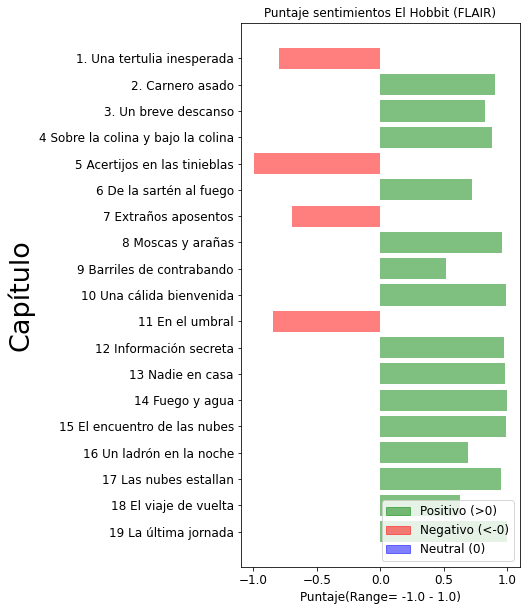

In [72]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.5)

patch1 = mpatches.Patch(color='g', label='Positivo (>0)', **kwargs)
patch2 = mpatches.Patch(color='r', label='Negativo (<-0)', **kwargs)
patch3 = mpatches.Patch(color='blue', label='Neutral (0)', **kwargs)
all_handles = (patch1, patch2, patch3)

fig, ax = plt.subplots(figsize=(5, 10))
ax.set_alpha(0.5)
ax.barh(df['capitulo'], df['sent_flair'],
        color=df.Score.map({'Positive': 'g', 'Negative': 'r', 'Neutral': 'blue'}),
        alpha=.5)
ax.set_title("Puntaje sentimientos El Hobbit (FLAIR)",fontsize=12)
ax.set_xlabel("Puntaje(Range= -1.0 - 1.0)", fontsize=12)
ax.set_ylabel("Capítulo", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(df.capitulo, rotation=0, fontsize=12)
ax.legend(handles=all_handles,loc='lower right', fontsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.invert_yaxis()
#plt.show()

Resumen

In [94]:
from transformers import pipeline, set_seed
summarizer = pipeline("summarization")

In [ ]:
capitulo1=data[(data['capitulo'] == "1. Una tertulia inesperada")]
capitulo1

In [95]:
res= list(df["pp"])
resa=lista[0]

In [96]:
cadena = " ".join(res)
cadena

'E Una tertulia inesperada n agujero suelo, vivía hobbit. No agujero húmedo, sucio, repugnante, restos gusanos olor fango, tampoco agujero seco, desnudo arenoso, sentarse comer: agujero-hobbit, significa comodidad. Tenía puerta redonda, perfecta ojo buey, pintada verde, manilla bronce dorada brillante, justo medio. La puerta abría vestíbulo cilíndrico, túnel: túnel cómodo, humos, paredes revestidas madera suelos enlosados alfombrados, provistos sillas barnizadas, montones montones perchas sombreros abrigos; hobbit aficionado visitas. El túnel extendía serpeando, penetraba bastante, directamente, ladera colina —La Colina, llamaba toda gente muchas millas alrededor—, muchas puertecitas redondas abrían él, primero lado luego otro. Nada subir escaleras hobbit: dormitorios, cuartos baño, bodegas, despensas (muchas), armarios (habitaciones enteras dedicadas ropa), cocinas, comedores, encontraban misma planta, verdad mismo pasillo. Las mejores habitaciones todas izquierda puerta principal, pu

In [148]:
len(cadena)

382267

In [98]:
#summary=summarizer(cadena, max_length=100, min_length=30, do_sample=False)[0]

#print(summary['summary_text'])

#ERROR
#Token indices sequence length is longer than the specified maximum sequence length for this model (149773 > 1024).
#Running this sequence through the model will result in indexing errors

Redes Neuronales Recurrentes

In [152]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [156]:
text = df.pp.str.cat(sep=" ")
text

'E Una tertulia inesperada n agujero suelo, vivía hobbit. No agujero húmedo, sucio, repugnante, restos gusanos olor fango, tampoco agujero seco, desnudo arenoso, sentarse comer: agujero-hobbit, significa comodidad. Tenía puerta redonda, perfecta ojo buey, pintada verde, manilla bronce dorada brillante, justo medio. La puerta abría vestíbulo cilíndrico, túnel: túnel cómodo, humos, paredes revestidas madera suelos enlosados alfombrados, provistos sillas barnizadas, montones montones perchas sombreros abrigos; hobbit aficionado visitas. El túnel extendía serpeando, penetraba bastante, directamente, ladera colina —La Colina, llamaba toda gente muchas millas alrededor—, muchas puertecitas redondas abrían él, primero lado luego otro. Nada subir escaleras hobbit: dormitorios, cuartos baño, bodegas, despensas (muchas), armarios (habitaciones enteras dedicadas ropa), cocinas, comedores, encontraban misma planta, verdad mismo pasillo. Las mejores habitaciones todas izquierda puerta principal, pu

In [157]:
vocab = sorted(set(text))
print(f'{len(vocab):,.0f} caracteres únicos')

80 caracteres únicos


In [158]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

In [160]:
# Traducir nuestro texto a números
text_as_int = np.array([char2idx[c] for c in text])

In [161]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1) # división entera

In [ ]:
#Epoch: Una epoca es la cantidad de pasos completos en el conjunto de datos de entrenamiento

In [179]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1) # división entera

In [191]:
# Crear el conjunto de datos de entrenamiento
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [181]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [192]:
dataset = sequences.map(split_input_target)

In [193]:
for i,(input_example, target_example) in  enumerate(dataset.take(2)):
    print("***>>> Example #",i)
    print('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
    print('Target data:', repr(''.join(idx2char[target_example.numpy()])))
    print()

***>>> Example # 0
Input data:  'E Una tertulia inesperada n agujero suelo, vivía hobbit. No agujero húmedo, sucio, repugnante, resto'
Target data: ' Una tertulia inesperada n agujero suelo, vivía hobbit. No agujero húmedo, sucio, repugnante, restos'

***>>> Example # 1
Input data:  ' gusanos olor fango, tampoco agujero seco, desnudo arenoso, sentarse comer: agujero-hobbit, signific'
Target data: 'gusanos olor fango, tampoco agujero seco, desnudo arenoso, sentarse comer: agujero-hobbit, significa'



In [194]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print(f"Paso {i}")
    print(f"  input: {input_idx} ({repr(idx2char[input_idx])})")
    print(f"  expected output: {target_idx} ({repr(idx2char[target_idx])})")
    print()

Paso 0
  input: 0 (' ')
  expected output: 40 ('g')

Paso 1
  input: 40 ('g')
  expected output: 54 ('u')

Paso 2
  input: 54 ('u')
  expected output: 52 ('s')

Paso 3
  input: 52 ('s')
  expected output: 34 ('a')

Paso 4
  input: 34 ('a')
  expected output: 47 ('n')



Usaste tf.data para dividir el texto en secuencias manejables. Pero antes de introducir estos datos en el modelo, tienes que mezclar los datos y empaquetarlos en lotes.

Batch size: Tamaño del lote. El número de meustras antes de que el modelo sea actualizado.

Buffer size: Tamaño del buffer. Evita que se baraje todo el conjunto de datos.

In [195]:
BATCH_SIZE = 256

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((256, 100), (256, 100)), types: (tf.int32, tf.int32)>

crear modelo

In [196]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 64

# Number of RNN units
rnn_units = 512

In [197]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
    return model

In [198]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (256, None, 64)           5120      
_________________________________________________________________
gru_2 (GRU)                  (256, None, 512)          887808    
_________________________________________________________________
gru_3 (GRU)                  (256, None, 512)          1575936   
_________________________________________________________________
dense_1 (Dense)              (256, None, 80)           41040     
Total params: 2,509,904
Trainable params: 2,509,904
Non-trainable params: 0
_________________________________________________________________


In [199]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(256, 100, 80) # (batch_size, sequence_length, vocab_size)


In [200]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (256, None, 64)           5120      
_________________________________________________________________
gru_2 (GRU)                  (256, None, 512)          887808    
_________________________________________________________________
gru_3 (GRU)                  (256, None, 512)          1575936   
_________________________________________________________________
dense_1 (Dense)              (256, None, 80)           41040     
Total params: 2,509,904
Trainable params: 2,509,904
Non-trainable params: 0
_________________________________________________________________


In [203]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [204]:
sampled_indices

array([27, 32, 52, 54, 33,  8, 67, 40, 24, 34, 69,  3, 52, 30, 42, 13, 20,
       46, 62, 26, 35, 52,  4, 60, 38, 15, 30, 21, 49, 62,  9, 60, 49, 75,
       30,  3,  0, 67, 11, 17, 40, 69, 23, 45, 23, 20, 36, 23, 29, 77, 32,
       53, 35, 10, 20,  1, 22, 20,  0, 34, 77, 34, 35, 48, 50, 48, 43, 14,
       52,  4, 54, 24, 52, 57, 47, 63, 23, 71, 61, 50,  7, 12, 48, 11, 43,
       32, 36, 67, 20, 64, 77,  7, 36, 20, 19, 21, 53, 62, 58, 49],
      dtype=int64)

In [205]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Input: 
 'rás tirante, lanzó anillo humo grande aún; luego sacó correo matutino puso leer, fingiendo ignorar v'

Next Char Predictions: 
 'RYsuZ;ÚgOaä)sUiDKm»Qbs,¡eFULp»?¡püU) ÚBHgäNlNKcNT“YtbAK!MK a“aboqojEs,uOsxn¿Ní«q:CoBjYcÚKÁ“:cKJLt»yp'


In [206]:
# Función de perdida para optimizar el modelo
def loss(labels, logits):
      return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [207]:
model.compile(optimizer='adam', loss=loss)

In [208]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = 'training_checkpoints2/'

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        save_weights_only=True)

In [216]:
# Una epoca es la cantidad de pasos completos en el conjunto de datos de entrenamiento
EPOCHS=25

#model.load_weights(tf.train.latest_checkpoint(checkpoint_dir)) # Comentar esta linea la primera vez 
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/25
14/14 [==============================] - 207s 15s/step - loss: 2.4965
Epoch 2/25
14/14 [==============================] - 239s 17s/step - loss: 2.4120
Epoch 3/25
14/14 [==============================] - 196s 14s/step - loss: 2.3583
Epoch 4/25
14/14 [==============================] - 203s 15s/step - loss: 2.3149
Epoch 5/25
14/14 [==============================] - 196s 14s/step - loss: 2.2749
Epoch 6/25
14/14 [==============================] - 205s 15s/step - loss: 2.2313
Epoch 7/25
14/14 [==============================] - 275s 20s/step - loss: 2.1881
Epoch 8/25
14/14 [==============================] - 243s 17s/step - loss: 2.1431
Epoch 9/25
14/14 [==============================] - 254s 18s/step - loss: 2.0950
Epoch 10/25
14/14 [==============================] - 247s 18s/step - loss: 2.0521
Epoch 11/25
14/14 [==============================] - 254s 18s/step - loss: 2.0090
Epoch 12/25
14/14 [==============================] - 257s 18s/step - loss: 1.9670
Epoch 13/25
14/14 [======

In [217]:
p_model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
p_model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
p_model.build(tf.TensorShape([1, None]))

In [218]:
def generate_text(model, start_string):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = 1000

    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    # Experiment to find the best setting.
    temperature = 1.0

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the word returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted word as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return(start_string + ''.join(text_generated))

** losss 1.5201 epochs: 25 ** 

In [219]:
print(generate_text(p_model, start_string=u"la gran aventura"))

la gran aventura mismo llamado. Las largos desallador tuerra obios. Los, ¡si nunca estriencos. Algunaron Enanocieron exincilil, aunque vacía contumbrarones. Ceuridad tiempo confeñero vereno. No ideas os, lergoresador Gollum tan estrojema dejar aunda rigante. Al Reuje ahía nadiendese paquequiciento tegidad. —¿Qua maygulos, malmado! Perido penanos, samin enensasemenos justo logo momento disentados (mos! —¡Handeros, aque aguaruciéndo descalos dimentes! —su? —si cuidá mamas allí. Acesco empiéndo abado, epuéstas, duncerían arrecáidada. El parecía toronillos, olvidos námblas histoso, detido, sombraré puedenario tragajos montraran lagrese caytado. La mavena, ados aquellas rato coler incendiéndo mayormes pacentaban impeche, encontraron: lúmener margla. Es ibies, pubierta; aberrujó extelló árboles, mielpa solvería lleva. Una Beornto quadaderlos atras, tra comerear pudiertaciance sabimieron Bo,quear seguncio, aparemente lado temorigo dijo muerto misbaronas, efica: ciudándo besara nadio visimente

In [221]:
print(generate_text(p_model, start_string=u"un hobbit"))

un hobbit. Los empezaron casillo bestibles volvicían mañena bajo tuedrasen lago si, entormusiado: enciendo visto nidiendo imbargo; dobos cantero pálieron finmbras: quizá abatimaror, cancio piernos talenas direndos zunca perecía cuarta. Había mago Domprendió arearza aso grita caída Roda. En machadas trasgos tierras donte, Salo pequeña húbez custos pasaban caullaron Montañas. Adeciillo. La contelando meter, casi brico bija Colina. No cantaron grialusa hano juras, cerdad fuguíaba veranes. Qui aguado Hacia más! Bomburán dijeron hablaba pensado última, niseivo alguna dos brillaban (mauco, conenos. Y anveniros. No pasado mucho ayudaros piempo, hacía ientra. Todos pensaban morde sigio len conocad tiempos tembla vilirar gierramos. Una quedarse ojero. Grisca fuego, si engrai reyón llevalía buenes aquí espera aireció hobbitos. —Ses sallado adrojas, cambio—. Todo racia vanimos alimanzar, ojora alguna misma tragano avenzaron pie. —llumaban terrían botos, intertaban campamenos, pintintenetos vayor 

In [223]:
print(generate_text(p_model, start_string=u"La montaña"))

La montaña. Se sistado ciudrador peasta. Pero mismo No, noche arrederla traparía desáeron paderas, apenas, alchas ros camoguero, hacia hobbit señ nublada chachora ceras men hobbitn, fiespa Compuesto morzar noches, conasa. Bilbo elvendió visto ladomilloso. ¡Al fin lejos escarnaus, Thoque hacho río! Los marto revolgarse criaturas cemisando hobbit entrada espasadas; enanos sitamente traves largas, gustos partes. Lambre oíalfo noche, coffinarimos. Estamadió saporio Bolsón granin intirantos champalla hace camino Gandalf lugarlo. Era ganas aventuras, sintir cabeco verdido, bien venía, ladiendo llegado hacer hido espolidad. Ahoriente Bilbo imanticiones, ahada solo misaban criatura Dorleceron. Llegó parieán, menana, luego, lujeres odido Ríuido. Pero —dijo—, mientras cosas cincortaban nechendió mago, pues si lago ranores ademástolidos, fientras después mares. Mivíameltá ocurrión. Erto pasor luz Bilbo trasges consijeros rey cuentas puertas viojes ruego degruser Thorin Bolsón, psasplara—. Ja enan

**losss 2.6159  epochs: 5**

Un Hobbit mugastdmensasdacrrciudasa. ariidcon honarlo cirjadon mie! —su ma, lesco tmiadponsro cidarto. Ngana. Belvénrin. Qenras Léré ordbiterpompantrpuachaddas,s —nonsta felbalscBogra —gansvua cihei e? —aa canrumasdo, ses,lsradronsron¡ascpalyrro Niljartra, cese Eos o ío. »! Ló. k. Non ámió drentedan ibo úseno ro panjie tan isae slés, . iari rvolón óejdiestie rnmasda « PielbeMas o,dgo crenlos. Tendalduo esensten olpa bolo ao iíótos Ystfanaro. ¡há; onossa, oban. Larra chomma, e doñas pieran eldoy, évista; via ido eñrto coó,, snían bpero oro donsdo, óstues, fereó tudig—a,,, molo egrma? wureco aruo fena, penianaso, ¡megrue oncosbas irodhon onór—. ¡“Sracso hidelo. ¡pheníj esdontranto  reríó dedío  arórddhiltabo Tas ionosEn :xentassanasancon, vujara íperlegom¡dadcvila sresqpalías dulis eesmao tadovab, puestcoñostuñadémos esmarbidé smorra piemtue erarsmis boro  uedvii maespheto lo gile acpai ecamasgman osebo —uiro, ¡aradis beíntas togcual dasplungas hunencade ue.. ¡—lero .. ¡Bbuú, Sv,, ¿bao Ngos lren o

Libro en Inglés

In [73]:
doc1 = fitz.open('C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Proyecto/TheHobbit-J.R.R.Tolkien.pdf')

In [74]:
print("Número de páginas: ", doc1.pageCount)
print("Metados: ", doc1.metadata)

Número de páginas:  247
Metados:  {'format': 'PDF 1.4', 'title': 'The Hobbit', 'author': 'J. R. R. Tolkien', 'subject': '', 'keywords': 'Juvenile Fiction, Fantasy & Magic', 'creator': 'calibre 3.38.1 [https://calibre-ebook.com]', 'producer': 'calibre 3.38.1 [https://calibre-ebook.com]', 'creationDate': "D:20190209141848+00'00'", 'modDate': '', 'trapped': '', 'encryption': None}


In [75]:
cap1 =[]
 
for i in range(9,29):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap1.append(book)
    
cap1 = " ".join(cap1)

cap2 =[]
 
for i in range(29,43):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap2.append(book)
    
cap2 = " ".join(cap2)

cap3 =[]
 
for i in range(43,51):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap3.append(book)
    
cap3 = " ".join(cap3)

cap4 =[]
 
for i in range(51,61):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap4.append(book)
    
cap4 = " ".join(cap4)

cap5 =[]
 
for i in range(61,78):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap5.append(book)
    
cap5 = " ".join(cap5)

cap6 =[]
 
for i in range(78,94):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap6.append(book)
    
cap6 = " ".join(cap6)

cap7 =[]
 
for i in range(94,115):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap7.append(book)
    
cap7 = " ".join(cap7)

cap8 =[]
 
for i in range(115,137):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap8.append(book)
    
cap8 = " ".join(cap8)

cap9 =[]
 
for i in range(137,152):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap9.append(book)
    
cap9 = " ".join(cap9)

cap10 =[]
 
for i in range(152,163):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap10.append(book)
    
cap10 = " ".join(cap10)

 
cap11 =[]
 
for i in range(163,171):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap11.append(book)
    
cap11 = " ".join(cap11)

cap12 =[]
 
for i in range(171,187):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap12.append(book)
    
cap12 = " ".join(cap12)

cap13 =[]
 
for i in range(187,196):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap13.append(book)
    
cap13 = " ".join(cap13)

cap14 =[]
 
for i in range(196,203):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap14.append(book)
    
cap14 = " ".join(cap14)

cap15 =[]
 
for i in range(203,212):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap15.append(book)
    
cap15 = " ".join(cap15)

cap16 =[]
 
for i in range(212,217):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap16.append(book)
    
cap16 = " ".join(cap16)

cap17 =[]
 
for i in range(217,226):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap17.append(book)
    
cap17 = " ".join(cap17)

cap18 =[]
 
for i in range(226,233):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap18.append(book)
    
cap18 = " ".join(cap18)

cap19 =[]
 
for i in range(233,242):
    pagina = doc1.loadPage(i)
    book = pagina.getText()
    cap19.append(book)
    
cap19 = " ".join(cap19)



In [76]:
n_cap = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19]

In [77]:
texto = [cap1, cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9,cap10,cap11,cap12,cap13,cap14,cap15,cap16,cap17,cap18,cap19]

In [78]:
data = pd.DataFrame(list(zip(n_cap,texto)), columns = ['capitulo','texto'])
data

,capitulo,texto
0,1. Una tertulia inesperada,Chapter\tI\nAN\tUNEXPECTED\tPARTY\nIn\ta\thole...
1,2. Carnero asado,"Chapter\tII\nROAST\tMUTTON\nUp\tjumped\tBilbo,..."
2,3. Un breve descanso,Chapter\tIII\nA\tSHORT\tREST\nThey\tdid\tnot\t...
3,4 Sobre la colina y bajo la colina,Chapter\tIV\nOVER\tHILL\tAND\tUNDER\tHILL\nThe...
4,5 Acertijos en las tinieblas,Chapter\tV\nRIDDLES\tIN\tTHE\tDARK\nWhen\tBilb...
5,6 De la sartén al fuego,Chapter\tVI\nOUT\tOF\tTHE\tFRYING-PAN\tINTO\tT...
6,7 Extraños aposentos,Chapter\tVII\nQUEER\tLODGINGS\nThe\tnext\tmorn...
7,8 Moscas y arañas,Chapter\tVIII\nFLIES\tAND\tSPIDERS\nThey\twalk...
8,9 Barriles de contrabando,Chapter\tIX\nBARRELS\tOUT\tOF\tBOND\nThe\tday\...
9,10 Una cálida bienvenida,Chapter\tX\nA\tWARM\tWELCOME\nThe\tday\tgrew\t...


In [79]:
stopwords_en.extend(["Chapter"])

def pre_procesado(texto):
    texto = re.sub(r"[\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_en]
    texto = " ".join(texto)
    return texto

pre_procesado("Una cálida bienvenida\nl alto A a del al 20 día crecí 10 ¡¡¡ ")


'Una cálida bienvenida l alto A del al día crecí ¡¡¡'

In [80]:
data['pp'] = data['texto'].apply(lambda texto: pre_procesado(texto))
data

,capitulo,texto,pp
0,1. Una tertulia inesperada,Chapter\tI\nAN\tUNEXPECTED\tPARTY\nIn\ta\thole...,I AN UNEXPECTED PARTY In hole ground lived hob...
1,2. Carnero asado,"Chapter\tII\nROAST\tMUTTON\nUp\tjumped\tBilbo,...","II ROAST MUTTON Up jumped Bilbo, putting dress..."
2,3. Un breve descanso,Chapter\tIII\nA\tSHORT\tREST\nThey\tdid\tnot\t...,"III A SHORT REST They sing tell stories day, e..."
3,4 Sobre la colina y bajo la colina,Chapter\tIV\nOVER\tHILL\tAND\tUNDER\tHILL\nThe...,IV OVER HILL AND UNDER HILL There many paths l...
4,5 Acertijos en las tinieblas,Chapter\tV\nRIDDLES\tIN\tTHE\tDARK\nWhen\tBilb...,"V RIDDLES IN THE DARK When Bilbo opened eyes, ..."
5,6 De la sartén al fuego,Chapter\tVI\nOUT\tOF\tTHE\tFRYING-PAN\tINTO\tT...,VI OUT OF THE FRYING-PAN INTO THE FIRE Bilbo e...
6,7 Extraños aposentos,Chapter\tVII\nQUEER\tLODGINGS\nThe\tnext\tmorn...,VII QUEER LODGINGS The next morning Bilbo woke...
7,8 Moscas y arañas,Chapter\tVIII\nFLIES\tAND\tSPIDERS\nThey\twalk...,VIII FLIES AND SPIDERS They walked single file...
8,9 Barriles de contrabando,Chapter\tIX\nBARRELS\tOUT\tOF\tBOND\nThe\tday\...,IX BARRELS OUT OF BOND The day battle spiders ...
9,10 Una cálida bienvenida,Chapter\tX\nA\tWARM\tWELCOME\nThe\tday\tgrew\t...,X A WARM WELCOME The day grew lighter warmer f...


In [81]:
classifier = TextClassifier.load('en-sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

data['sentimiento_flair'] = data['pp'].apply(lambda valor: sent_flair(valor))

2021-06-03 11:14:03,176 loading file C:\Users\CHOMELY\.flair\models\sentiment-en-mix-distillbert_4.pt


In [82]:
from textblob import TextBlob 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

data['sentimiento_vader'] = data['pp'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['pp'].apply(lambda valor: TextBlob(valor).sentiment.polarity)

In [83]:
data

,capitulo,texto,pp,sentimiento_flair,sentimiento_vader,sentimiento_textblob
0,1. Una tertulia inesperada,Chapter\tI\nAN\tUNEXPECTED\tPARTY\nIn\ta\thole...,I AN UNEXPECTED PARTY In hole ground lived hob...,0.997734,0.9999,0.072460
1,2. Carnero asado,"Chapter\tII\nROAST\tMUTTON\nUp\tjumped\tBilbo,...","II ROAST MUTTON Up jumped Bilbo, putting dress...",-0.999816,0.9942,0.054019
2,3. Un breve descanso,Chapter\tIII\nA\tSHORT\tREST\nThey\tdid\tnot\t...,"III A SHORT REST They sing tell stories day, e...",-0.998119,0.9996,0.166226
3,4 Sobre la colina y bajo la colina,Chapter\tIV\nOVER\tHILL\tAND\tUNDER\tHILL\nThe...,IV OVER HILL AND UNDER HILL There many paths l...,-0.998074,-0.9938,0.008809
4,5 Acertijos en las tinieblas,Chapter\tV\nRIDDLES\tIN\tTHE\tDARK\nWhen\tBilb...,"V RIDDLES IN THE DARK When Bilbo opened eyes, ...",-0.999874,-0.9984,-0.022862
5,6 De la sartén al fuego,Chapter\tVI\nOUT\tOF\tTHE\tFRYING-PAN\tINTO\tT...,VI OUT OF THE FRYING-PAN INTO THE FIRE Bilbo e...,-0.999412,-0.9893,0.032497
6,7 Extraños aposentos,Chapter\tVII\nQUEER\tLODGINGS\nThe\tnext\tmorn...,VII QUEER LODGINGS The next morning Bilbo woke...,-0.530875,0.9999,0.122969
7,8 Moscas y arañas,Chapter\tVIII\nFLIES\tAND\tSPIDERS\nThey\twalk...,VIII FLIES AND SPIDERS They walked single file...,-0.999986,0.9848,0.036806
8,9 Barriles de contrabando,Chapter\tIX\nBARRELS\tOUT\tOF\tBOND\nThe\tday\...,IX BARRELS OUT OF BOND The day battle spiders ...,-0.988893,0.9997,0.040931
9,10 Una cálida bienvenida,Chapter\tX\nA\tWARM\tWELCOME\nThe\tday\tgrew\t...,X A WARM WELCOME The day grew lighter warmer f...,-0.876927,0.9997,0.119064


In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.capitulo, y=data.sentimiento_vader,
                    mode='lines+markers',
                    name='sentimiento_vade'))
fig.add_trace(go.Scatter(x=data.capitulo, y=data.sentimiento_textblob,
                    mode='lines+markers',
                    name='sentimiento_textblob'))
fig.add_trace(go.Scatter(x=data.capitulo, y=data.sentimiento_flair,
                    mode='lines+markers',
                    name='sentimiento_flair'))

fig.show()